make sure below says its in sudocode dir

In [1]:
import os
os.chdir(os.path.join(os.getcwd(),'..'))
print(os.getcwd())

c:\Users\jsteb\sudocode


In [2]:
from utils import *
from solvers import *
import os
import pandas as pd
from datetime import datetime
def get_time():
    return datetime.now().strftime("%m/%d/%Y %H:%M:%S.%f")

In [5]:
data = pd.concat([
    pd.read_csv('data/n2.csv'),
    pd.read_csv('data/n3.csv'),
    pd.read_csv('data/n4.csv')
], ignore_index=True)

print(len(data))

df = pd.read_csv('out/results.csv')
print(len(df))

11040
8331


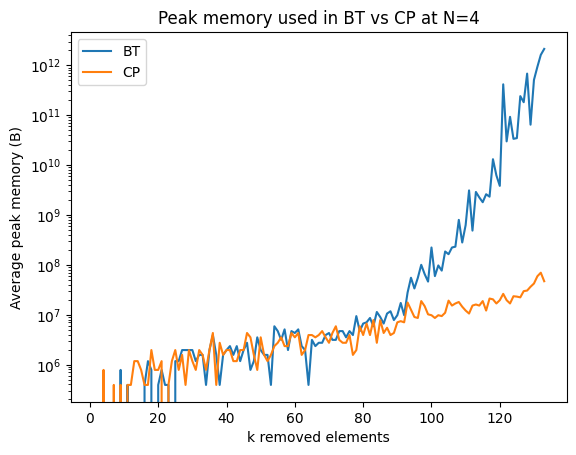

In [99]:
# cols = n, k, pzl, bt_valid, bt_time_ns, bt_recs, bt_space_B, cp_valid, cp_time_ns, cp_recs, cp_space_B

import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib import ticker
from math import log

N = 4

bt_time_means = df[df['n']==N].groupby('k')['bt_time_ns'].mean()#.apply(lambda x: 0 if not x else log(x, 2))
cp_time_means = df[df['n']==N].groupby('k')['cp_time_ns'].mean()#.apply(lambda x: 0 if not x else log(x, 2))    

fig = plt.figure()
ax = fig.add_subplot()
ax.set_yscale('log')
ax.plot(bt_time_means.index, bt_time_means, label='BT')
ax.plot(cp_time_means.index, cp_time_means, label='CP')
ax.set_xlabel('k removed elements')
ax.set_ylabel('Average peak memory (B)')
ax.set_title(f'Peak memory used in BT vs CP at N={N}')
ax.legend(loc='best')
# formatter = ticker.ScalarFormatter(useMathText=True)
# formatter.set_scientific(True)
# formatter.set_powerlimits((-1,1))
# ax.yaxis.set_major_formatter(formatter)
plt.show()